# Advanced Data Analytics Mini-Project
## **"Causal Impact of Physical Activity on Sleep Quality Using Wearable Device Data"**


## Team Members:
### - Shri Hari [PES1UG22AM154]
### - Venkat Subramanian [PES1UG22AM188]
### - Vishwanath Sridhar [PES1UG22AM194]
### - Vismaya Vadana [PES1UG22AM195]

### Loading and cleaning the dataset

In [21]:
import pandas as pd

# List of selected CSV files
csv_files = [
    '/content/dailyActivity_merged.csv',
    '/content/dailyCalories_merged.csv',
    '/content/dailyIntensities_merged.csv',
    '/content/dailySteps_merged.csv',
    '/content/heartrate_seconds_merged.csv',
    '/content/sleepDay_merged.csv',
    '/content/minuteMETsNarrow_merged.csv'
]

# Loop through each file and display its columns
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)

    # Display the file name and columns
    print(f"Columns in {file}:")
    print(df.columns.tolist())
    print("\n" + "-"*50 + "\n")
    print(df.head())

Columns in /content/dailyActivity_merged.csv:
['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

--------------------------------------------------

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1

In [22]:
# Merging sleep Data
daily_Data=pd.read_csv('/content/dailyActivity_merged.csv')
sleep_Data = pd.read_csv('/content/sleepDay_merged.csv')
sleep_Data['SleepDay'] = pd.to_datetime(sleep_Data['SleepDay']).dt.date  # Converting to date format
daily_Data['ActivityDate'] = pd.to_datetime(daily_Data['ActivityDate']).dt.date  # Ensure same date format

Data = pd.merge(daily_Data, sleep_Data, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
print(Data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

<ipython-input-22-ea532bcff821>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_Data['SleepDay'] = pd.to_datetime(sleep_Data['SleepDay']).dt.date  # Converting to date format


In [23]:
# Aggregating METs Data
mets_Data = pd.read_csv('/content/minuteMETsNarrow_merged.csv')
mets_Data['ActivityMinute'] = pd.to_datetime(mets_Data['ActivityMinute'])
mets_Data['Date'] = mets_Data['ActivityMinute'].dt.date  # Extracting the date from time

# Aggregating to daily level (average METs per day)
daily_mets = mets_Data.groupby(['Id', 'Date'], as_index=False)['METs'].mean()

# Merging METs Data
Data = pd.merge(Data, daily_mets, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'])
print(Data.head())

<ipython-input-23-0d0e0386873c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mets_Data['ActivityMinute'] = pd.to_datetime(mets_Data['ActivityMinute'])


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0              

In [24]:
# Drop rows where 'SleepDay' is NaN, and modify the original Dataframe
Data.dropna(subset=['SleepDay'], inplace=True)

# Verify that the NaN rows are dropped
print(Data)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162           8.50             8.50   
1    1503960366   2016-04-13       10735           6.97             6.97   
3    1503960366   2016-04-15        9762           6.28             6.28   
4    1503960366   2016-04-16       12669           8.16             8.16   
5    1503960366   2016-04-17        9705           6.48             6.48   
..          ...          ...         ...            ...              ...   
901  8792009665   2016-04-30        7174           4.59             4.59   
902  8792009665   2016-05-01        1619           1.04             1.04   
903  8792009665   2016-05-02        1831           1.17             1.17   
904  8792009665   2016-05-03        2421           1.55             1.55   
905  8792009665   2016-05-04        2283           1.46             1.46   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

### Basic Data Analysis

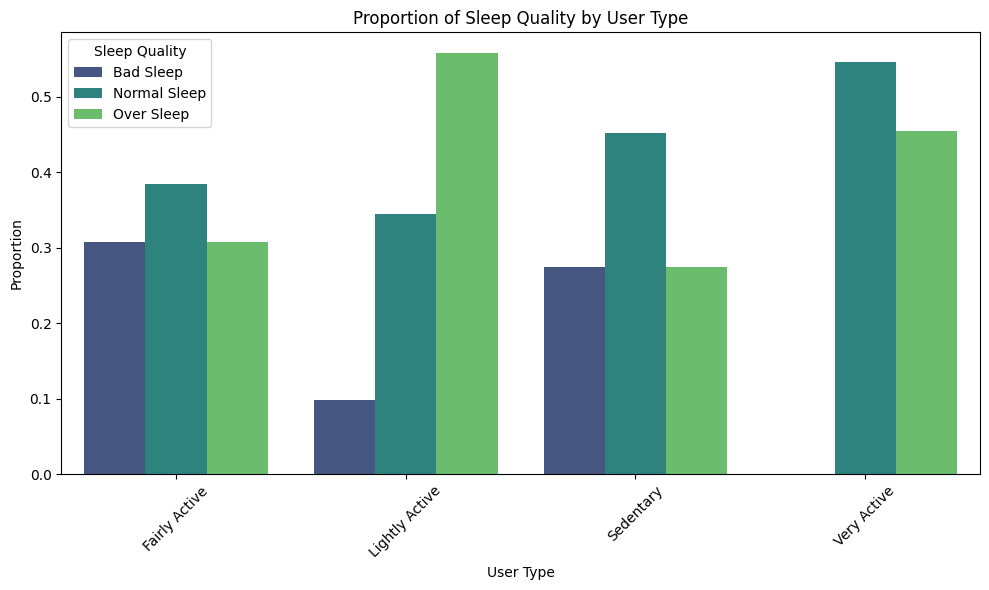

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Classify users into activity and sleep categories
def classify_user_type(row, sedentary_mean, lightly_mean, fairly_mean, very_mean):
    if (row['SedentaryMinutes'] > sedentary_mean and
        row['LightlyActiveMinutes'] < lightly_mean and
        row['FairlyActiveMinutes'] < fairly_mean and
        row['VeryActiveMinutes'] < very_mean):
        return "Sedentary"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] > lightly_mean and
          row['FairlyActiveMinutes'] < fairly_mean and
          row['VeryActiveMinutes'] < very_mean):
        return "Lightly Active"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] < lightly_mean and
          row['FairlyActiveMinutes'] > fairly_mean and
          row['VeryActiveMinutes'] < very_mean):
        return "Fairly Active"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] < lightly_mean and
          row['FairlyActiveMinutes'] < fairly_mean and
          row['VeryActiveMinutes'] > very_mean):
        return "Very Active"
    else:
        return None

def classify_sleep_quality(minutes_asleep):
    if minutes_asleep < 360:
        return "Bad Sleep"
    elif 360 <= minutes_asleep <= 480:
        return "Normal Sleep"
    else:
        return "Over Sleep"

# Calculate means
sedentary_mean = Data['SedentaryMinutes'].mean()
lightly_mean = Data['LightlyActiveMinutes'].mean()
fairly_mean = Data['FairlyActiveMinutes'].mean()
very_mean = Data['VeryActiveMinutes'].mean()

# Add user_type and sleep_type columns
Data['user_type'] = Data.apply(
    classify_user_type, axis=1,
    sedentary_mean=sedentary_mean,
    lightly_mean=lightly_mean,
    fairly_mean=fairly_mean,
    very_mean=very_mean
)

Data['sleep_type'] = Data['TotalMinutesAsleep'].apply(classify_sleep_quality)

# Step 2: Aggregate data
summary = Data.groupby(['user_type', 'sleep_type'])['Id'].count().reset_index()
summary.rename(columns={'Id': 'count'}, inplace=True)

# Calculate proportions
total_counts = summary.groupby('user_type')['count'].transform('sum')
summary['proportion'] = summary['count'] / total_counts

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='user_type', y='proportion', hue='sleep_type', palette='viridis')
plt.title('Proportion of Sleep Quality by User Type')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.legend(title='Sleep Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Import necessary libraries
import pandas as pd

# Compute quartiles for METs and TotalSteps
METs_quartiles = Data['METs'].quantile([0.25, 0.5, 0.75])
TotalSteps_quartiles = Data['TotalSteps'].quantile([0.25, 0.5, 0.75])

# Display quartiles
print("METs Quartiles:")
print(METs_quartiles)

print("\nTotalSteps Quartiles:")
print(TotalSteps_quartiles)

METs Quartiles:
0.25    13.642361
0.50    15.468750
0.75    16.888889
Name: METs, dtype: float64

TotalSteps Quartiles:
0.25     5206.0
0.50     8925.0
0.75    11393.0
Name: TotalSteps, dtype: float64


<ipython-input-27-09ae9228b357>:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary, x='user_type', y='proportion', hue='sleep_type',


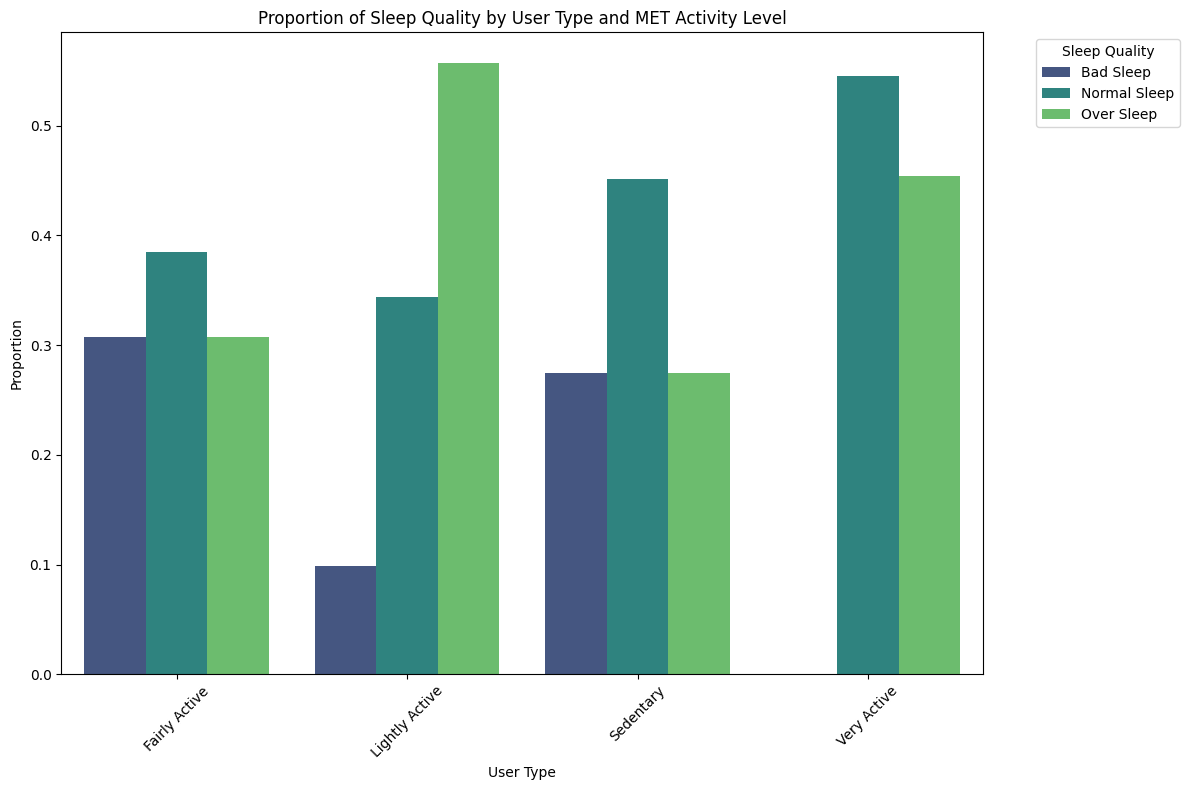

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Classify users into activity and sleep categories
def classify_user_type(row, sedentary_mean, lightly_mean, fairly_mean, very_mean):
    if (row['SedentaryMinutes'] > sedentary_mean and
        row['LightlyActiveMinutes'] < lightly_mean and
        row['FairlyActiveMinutes'] < fairly_mean and
        row['VeryActiveMinutes'] < very_mean):
        return "Sedentary"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] > lightly_mean and
          row['FairlyActiveMinutes'] < fairly_mean and
          row['VeryActiveMinutes'] < very_mean):
        return "Lightly Active"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] < lightly_mean and
          row['FairlyActiveMinutes'] > fairly_mean and
          row['VeryActiveMinutes'] < very_mean):
        return "Fairly Active"
    elif (row['SedentaryMinutes'] < sedentary_mean and
          row['LightlyActiveMinutes'] < lightly_mean and
          row['FairlyActiveMinutes'] < fairly_mean and
          row['VeryActiveMinutes'] > very_mean):
        return "Very Active"
    else:
        return None

def classify_sleep_quality(minutes_asleep):
    if minutes_asleep < 360:
        return "Bad Sleep"
    elif 360 <= minutes_asleep <= 480:
        return "Normal Sleep"
    else:
        return "Over Sleep"

# Step 2: Classify METs into categories
def categorize_mets(mets):
    if mets <= 1.5:
        return 'Sedentary'
    elif 1.5 < mets <= 3.0:
        return 'Lightly Active'
    elif 3.0 < mets <= 5.0:
        return 'Fairly Active'
    else:
        return 'Very Active'

# Calculate means for user type classification
sedentary_mean = Data['SedentaryMinutes'].mean()
lightly_mean = Data['LightlyActiveMinutes'].mean()
fairly_mean = Data['FairlyActiveMinutes'].mean()
very_mean = Data['VeryActiveMinutes'].mean()

# Add user_type and sleep_type columns
Data['user_type'] = Data.apply(
    classify_user_type, axis=1,
    sedentary_mean=sedentary_mean,
    lightly_mean=lightly_mean,
    fairly_mean=fairly_mean,
    very_mean=very_mean
)

Data['sleep_type'] = Data['TotalMinutesAsleep'].apply(classify_sleep_quality)

# Step 3: Classify METs and add to data
Data['MET_activity_level'] = Data['METs'].apply(categorize_mets)

# Step 4: Aggregate data
summary = Data.groupby(['user_type', 'sleep_type', 'MET_activity_level'])['Id'].count().reset_index()
summary.rename(columns={'Id': 'count'}, inplace=True)

# Calculate proportions
total_counts = summary.groupby(['user_type', 'MET_activity_level'])['count'].transform('sum')
summary['proportion'] = summary['count'] / total_counts

# Step 5: Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(data=summary, x='user_type', y='proportion', hue='sleep_type',
            hue_order=['Bad Sleep', 'Normal Sleep', 'Over Sleep'],
            palette='viridis', ci=None)
plt.title('Proportion of Sleep Quality by User Type and MET Activity Level')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
!pip install causalimpact

### PSM Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


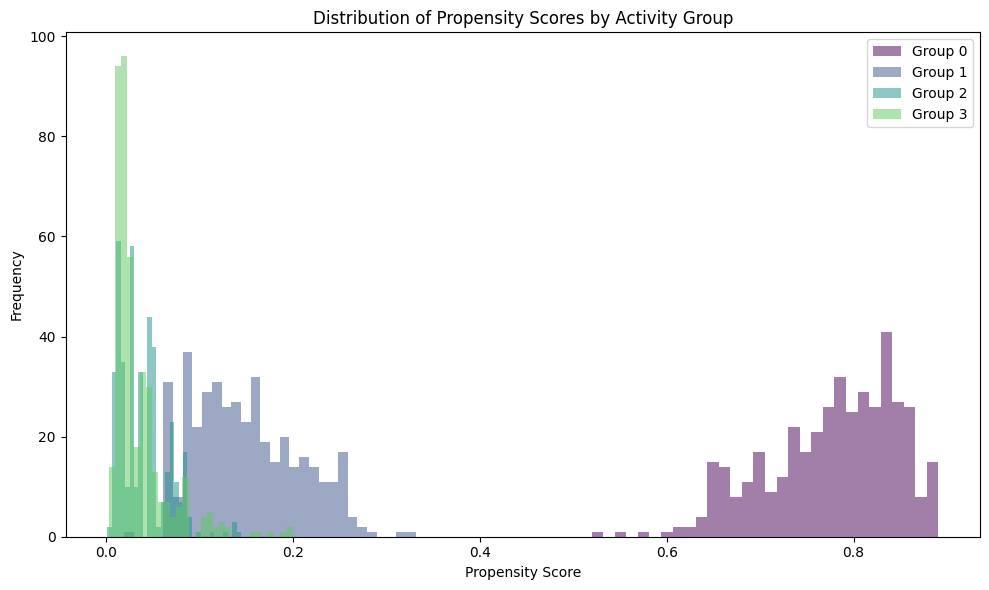

Balance of Confounders Before and After Matching:
          Before Matching  After Matching
Calories    -3.440885e-17       -0.259709
METs         8.946301e-16       -0.036235


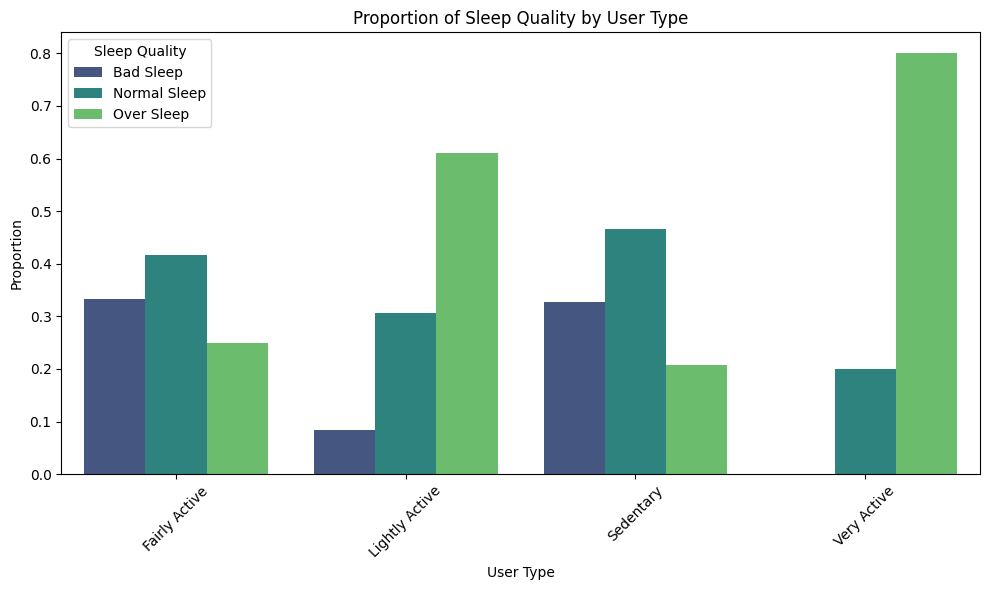

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# --- Step 1: Data Preprocessing and Categorization ---
# Function to categorize user activity levels based on minutes of activity
def classify_user_type(row, sedentary_mean, lightly_mean, fairly_mean, very_mean):
    if (row['SedentaryMinutes'] > sedentary_mean and
        row['LightlyActiveMinutes'] <= lightly_mean and
        row['FairlyActiveMinutes'] <= fairly_mean and
        row['VeryActiveMinutes'] <= very_mean):
        return "Sedentary"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] > lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Lightly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] > fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Fairly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] > very_mean):
        return "Very Active"

    else:
        return "Sedentary"

# Function to classify sleep quality based on total minutes asleep
def classify_sleep_quality(minutes_asleep):
    if minutes_asleep < 360:
        return "Bad Sleep"
    elif 360 <= minutes_asleep <= 480:
        return "Normal Sleep"
    else:
        return "Over Sleep"

# Calculate means for user type classification
sedentary_mean = Data['SedentaryMinutes'].mean()
lightly_mean = Data['LightlyActiveMinutes'].mean()
fairly_mean = Data['FairlyActiveMinutes'].mean()
very_mean = Data['VeryActiveMinutes'].mean()

# Add user_type and sleep_type columns to the DataFrame
Data['user_type'] = Data.apply(
    classify_user_type, axis=1,
    sedentary_mean=sedentary_mean,
    lightly_mean=lightly_mean,
    fairly_mean=fairly_mean,
    very_mean=very_mean
)

Data['sleep_type'] = Data['TotalMinutesAsleep'].apply(classify_sleep_quality)

# --- Step 2: Propensity Score Matching (PSM) ---
# Define treatment groups based on user_type
treatment_mapping = {
    "Sedentary": 0,
    "Lightly Active": 1,
    "Fairly Active": 2,
    "Very Active": 3
}

Data['treatment'] = Data['user_type'].map(treatment_mapping)

# Define confounders: Calories, METs (excluding SedentaryMinutes and VeryActiveMinutes)
confounders = ['Calories', 'METs']

# Standardize the confounders to make sure they're on the same scale
scaler = StandardScaler()
Data[confounders] = scaler.fit_transform(Data[confounders])

# Fit a logistic regression model to estimate the propensity score
# The propensity score is the probability of being in a particular group based on confounders
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(Data[confounders], Data['treatment'])

# Estimate propensity scores (probabilities of being in each activity group)
propensity_scores = log_reg.predict_proba(Data[confounders])

# --- Step 3: Matching Users Based on Propensity Scores ---
# We will match users from different groups based on their similarity in propensity scores
nn = NearestNeighbors(n_neighbors=1)

matched_indices = []
for i in range(4):  # Matching for each treatment group
    treatment_group_indices = np.where(Data['treatment'] == i)[0]  # Find all users in group i
    nn.fit(propensity_scores[treatment_group_indices])  # Fit the nearest neighbor model
    matched_indices_for_group = nn.kneighbors(propensity_scores[treatment_group_indices], return_distance=False)
    matched_indices.append(matched_indices_for_group)

# Flatten the list of matched indices
matched_indices = np.concatenate(matched_indices).flatten()

# Create a matched dataset based on propensity scores
matched_data = Data.iloc[matched_indices]

# --- Step 4: Visualizing the Propensity Scores ---
# Plot histogram of propensity scores for each treatment group
plt.figure(figsize=(10, 6))

for i in range(4):
    plt.hist(propensity_scores[:, i], bins=30, alpha=0.5, label=f'Group {i}', color=plt.cm.viridis(i / 4))

plt.title('Distribution of Propensity Scores by Activity Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 5: Checking Covariate Balance Before and After Matching ---
def check_balance(data, matched_data, confounders):
    before_balance = data[confounders].mean()
    after_balance = matched_data[confounders].mean()

    balance_df = pd.DataFrame({
        'Before Matching': before_balance,
        'After Matching': after_balance
    })
    return balance_df

# Calculate and display balance
balance_df = check_balance(Data, matched_data, confounders)
print("Balance of Confounders Before and After Matching:")
print(balance_df)

# --- Step 6: Visualize the Results (Proportion of Sleep Quality by User Type) ---
summary = matched_data.groupby(['user_type', 'sleep_type'])['Date'].count().reset_index()
summary.rename(columns={'Date': 'count'}, inplace=True)

# Calculate proportions of sleep quality outcomes
total_counts = summary.groupby('user_type')['count'].transform('sum')
summary['proportion'] = summary['count'] / total_counts

# Visualize the proportion of sleep quality by user type
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='user_type', y='proportion', hue='sleep_type', palette='viridis')
plt.title('Proportion of Sleep Quality by User Type')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.legend(title='Sleep Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 7: Save the final DataFrame to CSV (optional) ---
matched_data.to_csv('matched_activity_sleep_analysis.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


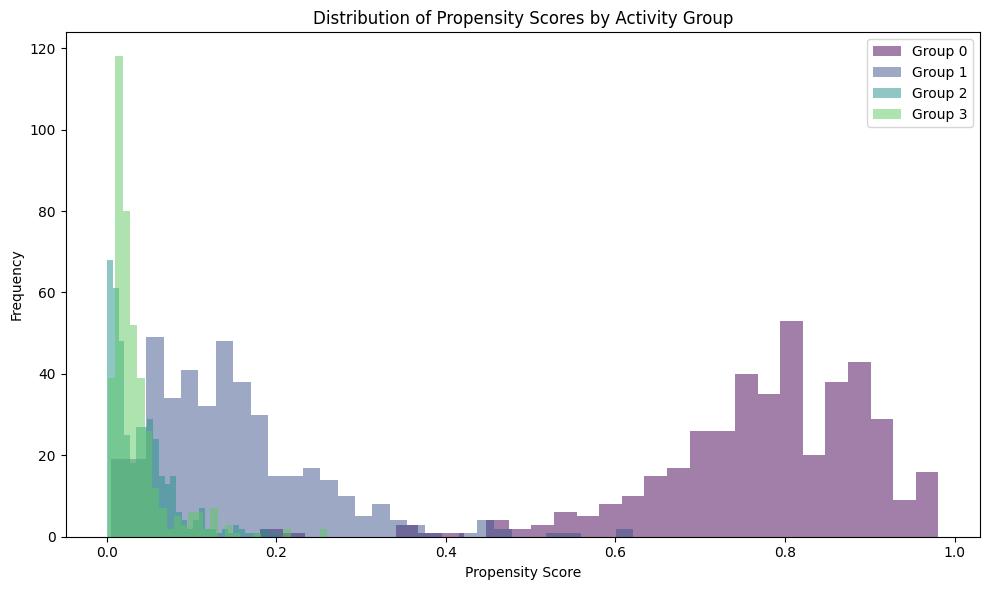

Balance of Confounders Before and After Matching:
                Before Matching  After Matching
Calories           0.000000e+00       -0.266389
METs              -3.440885e-17       -0.046696
TotalSteps         2.150553e-16        0.026437
TotalTimeInBed    -1.247321e-16       -0.003662


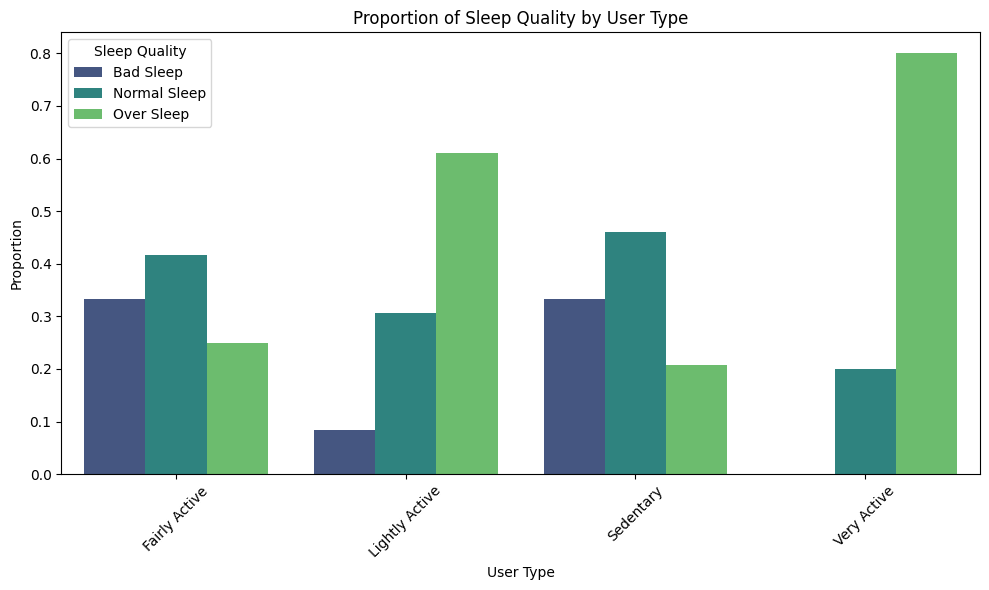

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# --- Step 1: Data Preprocessing and Categorization ---

# Function to categorize user activity levels based on minutes of activity
def classify_user_type(row, sedentary_mean, lightly_mean, fairly_mean, very_mean):
    if (row['SedentaryMinutes'] > sedentary_mean and
        row['LightlyActiveMinutes'] <= lightly_mean and
        row['FairlyActiveMinutes'] <= fairly_mean and
        row['VeryActiveMinutes'] <= very_mean):
        return "Sedentary"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] > lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Lightly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] > fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Fairly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] > very_mean):
        return "Very Active"

    else:
        return "Sedentary"

# Function to classify sleep quality based on total minutes asleep
def classify_sleep_quality(minutes_asleep):
    if minutes_asleep < 360:
        return "Bad Sleep"
    elif 360 <= minutes_asleep <= 480:
        return "Normal Sleep"
    else:
        return "Over Sleep"

# Calculate means for user type classification
sedentary_mean = Data['SedentaryMinutes'].mean()
lightly_mean = Data['LightlyActiveMinutes'].mean()
fairly_mean = Data['FairlyActiveMinutes'].mean()
very_mean = Data['VeryActiveMinutes'].mean()

# Add user_type and sleep_type columns to the DataFrame
Data['user_type'] = Data.apply(
    classify_user_type, axis=1,
    sedentary_mean=sedentary_mean,
    lightly_mean=lightly_mean,
    fairly_mean=fairly_mean,
    very_mean=very_mean
)

Data['sleep_type'] = Data['TotalMinutesAsleep'].apply(classify_sleep_quality)

# --- Step 2: Propensity Score Matching (PSM) ---

# Define treatment groups based on user_type
treatment_mapping = {
    "Sedentary": 0,
    "Lightly Active": 1,
    "Fairly Active": 2,
    "Very Active": 3
}

Data['treatment'] = Data['user_type'].map(treatment_mapping)

# Define confounders: Calories, METs, TotalSteps, TimeInBed
confounders = ['Calories', 'METs', 'TotalSteps', 'TotalTimeInBed']

# Standardize the confounders
scaler = StandardScaler()
Data[confounders] = scaler.fit_transform(Data[confounders])

# Fit a logistic regression model for each treatment group (multinomial outcome)
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(Data[confounders], Data['treatment'])

# Estimate propensity scores (probabilities of being in each activity group)
propensity_scores = log_reg.predict_proba(Data[confounders])

# We will perform matching based on the propensity scores for each treatment group
nn = NearestNeighbors(n_neighbors=1)
matched_indices = []

for i in range(4):  # Matching for each treatment group
    treatment_group_indices = np.where(Data['treatment'] == i)[0]
    nn.fit(propensity_scores[treatment_group_indices])
    matched_indices_for_group = nn.kneighbors(propensity_scores[treatment_group_indices], return_distance=False)
    matched_indices.append(matched_indices_for_group)

# Flatten the list of matched indices
matched_indices = np.concatenate(matched_indices).flatten()

# Create a matched dataset based on propensity scores
matched_data = Data.iloc[matched_indices]

# --- Step 3: Visualizing the Propensity Scores ---

# Plot histogram of propensity scores for each treatment group
plt.figure(figsize=(10, 6))

for i in range(4):
    plt.hist(propensity_scores[:, i], bins=30, alpha=0.5, label=f'Group {i}', color=plt.cm.viridis(i / 4))

plt.title('Distribution of Propensity Scores by Activity Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 4: Checking Covariate Balance Before and After Matching ---

# Function to calculate mean differences for covariates before and after matching
def check_balance(data, matched_data, confounders):
    before_balance = data[confounders].mean()
    after_balance = matched_data[confounders].mean()

    balance_df = pd.DataFrame({
        'Before Matching': before_balance,
        'After Matching': after_balance
    })
    return balance_df

# Calculate and display balance
balance_df = check_balance(Data, matched_data, confounders)
print("Balance of Confounders Before and After Matching:")
print(balance_df)

# --- Step 5: Visualize the Results (Proportion of Sleep Quality by User Type) ---

# Compare sleep outcomes between matched users
summary = matched_data.groupby(['user_type', 'sleep_type'])['Date'].count().reset_index()
summary.rename(columns={'Date': 'count'}, inplace=True)

# Calculate proportions
total_counts = summary.groupby('user_type')['count'].transform('sum')
summary['proportion'] = summary['count'] / total_counts

# Visualize the proportion of sleep quality by user type
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='user_type', y='proportion', hue='sleep_type', palette='viridis')
plt.title('Proportion of Sleep Quality by User Type')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.legend(title='Sleep Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 6: Save the final DataFrame to CSV (optional) ---
matched_data.to_csv('matched_activity_sleep_analysis.csv', index=False)

### Causal Inference: Physical Activity's Impact on Sleep Quality

To estimate the causal effect of physical activity on sleep quality, we apply causal inference techniques using the Propensity Score Matching (PSM) results as a baseline.
We aim to answer the question: **"Does higher physical activity improve sleep quality?"**

In [31]:
# Create the DataFrame with matched pairs
matched_data = Data.iloc[matched_indices]

In [32]:
!pip install dowhy

In [33]:
import pandas as pd

# Step 1: Calculate the mean values for activity minutes
sedentary_mean = matched_data['SedentaryMinutes'].mean()
lightly_mean = matched_data['LightlyActiveMinutes'].mean()
fairly_mean = matched_data['FairlyActiveMinutes'].mean()
very_mean = matched_data['VeryActiveMinutes'].mean()

# Step 2: Apply the classify_user_type function
def classify_user_type(row):
    if (row['SedentaryMinutes'] > sedentary_mean and
        row['LightlyActiveMinutes'] <= lightly_mean and
        row['FairlyActiveMinutes'] <= fairly_mean and
        row['VeryActiveMinutes'] <= very_mean):
        return "Sedentary"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] > lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Lightly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] > fairly_mean and
          row['VeryActiveMinutes'] <= very_mean):
        return "Fairly Active"

    elif (row['SedentaryMinutes'] <= sedentary_mean and
          row['LightlyActiveMinutes'] <= lightly_mean and
          row['FairlyActiveMinutes'] <= fairly_mean and
          row['VeryActiveMinutes'] > very_mean):
        return "Very Active"

    else:
        return "Sedentary"

# Add the 'physical_activity' column to the dataset
matched_data['physical_activity'] = matched_data.apply(classify_user_type, axis=1)

# Verify the results
print(matched_data[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'physical_activity']].head())

   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  \
0               728                   328                   13   
1               776                   217                   19   
3               726                   209                   34   
4               773                   221                   10   
5               539                   164                   20   

   VeryActiveMinutes physical_activity  
0                 25         Sedentary  
1                 21         Sedentary  
3                 29         Sedentary  
4                 36         Sedentary  
5                 38         Sedentary  


<ipython-input-33-37d87719db0b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_data['physical_activity'] = matched_data.apply(classify_user_type, axis=1)


<ipython-input-34-8378e4f62f82>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_data.loc[:, 'sleep_quality'] = matched_data['TotalMinutesAsleep']
<ipython-input-34-8378e4f62f82>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['physical_activity'] = matched_data['physical_activity'].map(
<ipython-input-34-8378e4f62f82>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

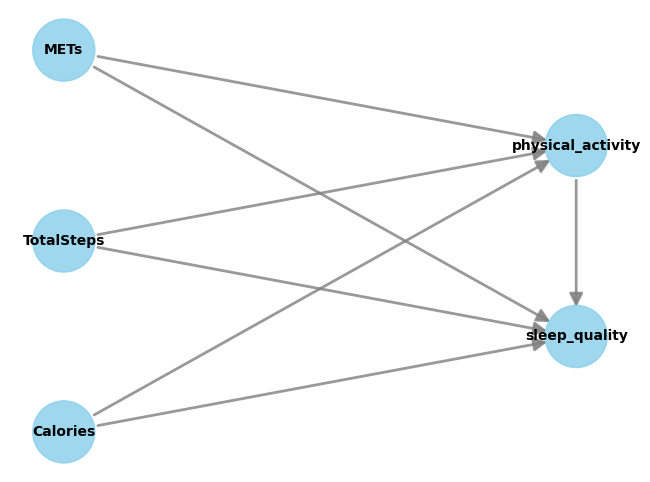

Identified Estimand:  Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                     
────────────────────(E[sleep_quality|Calories,TotalSteps,METs])
d[physical_activity]                                           
Estimand assumption 1, Unconfoundedness: If U→{physical_activity} and U→sleep_quality then P(sleep_quality|physical_activity,Calories,TotalSteps,METs,U) = P(sleep_quality|physical_activity,Calories,TotalSteps,METs)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                     
────────────────────(E[sleep_quality|Calories,TotalSteps,METs])
d[physical_activity]     

In [34]:
import dowhy
from dowhy import CausalModel
import pandas as pd

# Define treatment, outcome, and confounders
treatment = 'physical_activity'
outcome = 'sleep_quality'
covariates = ['TotalSteps', 'Calories', 'METs']

matched_data.loc[:, 'sleep_quality'] = matched_data['TotalMinutesAsleep']

data = matched_data[['physical_activity', 'sleep_quality'] + covariates]

activity_mapping = {
    "Sedentary": 0,
    "Lightly Active": 1,
    "Fairly Active": 2,
    "Very Active": 3
}

# Step 2: Map the physical_activity column to numeric values
data['physical_activity'] = matched_data['physical_activity'].map(
    lambda x: 1 if x in ["Fairly Active", "Very Active"] else 0
)

# Ensure data is cleaned and numeric
data['sleep_quality'] = pd.to_numeric(data['sleep_quality'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Check if variables are in data
for var in [treatment, outcome] + covariates:
    if var not in data.columns:
        print(f"Variable '{var}' not found in data!")
        raise ValueError(f"Variable '{var}' missing!")

# Define causal model
causal_model = CausalModel(
    data=data,
    treatment=treatment,
    outcome=outcome,
    common_causes=covariates
)

# Visualize causal graph
causal_model.view_model()

# Identify the causal effect
identified_estimand = causal_model.identify_effect(proceed_when_unidentifiable=True)
print("Identified Estimand: ", identified_estimand)

# Check if estimand was found
if not identified_estimand.estimands:
    raise ValueError("No valid estimand identified. Revisit causal assumptions and data.")

# Estimate causal effect using backdoor adjustment
causal_estimate = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching",
    target_units="ate"
)

print("Causal Estimate: ", causal_estimate)

# Refutation
try:
    refutation = causal_model.refute_estimate(
        identified_estimand,
        causal_estimate,
        method_name="random_common_cause"
    )
    print(refutation)
except ValueError as e:
    print(f"Refutation failed: {e}")

The results from both the PSM graph and the causal analysis provide complementary insights into the relationship between physical activity levels and sleep quality:

### **Graph-Based Insight:**

The graph indicates that individuals with higher physical activity levels (e.g., "Very Active") tend to have a significantly higher proportion of "Over Sleep" or "Normal Sleep," suggesting improved sleep quality compared to those in "Sedentary" or "Lightly Active" categories, who are more likely to experience "Bad Sleep."
This provides a clear visual trend of a positive association between physical activity and better sleep quality.

### **Causal Analysis Insight:**

The causal analysis quantifies this relationship, estimating that increasing physical activity by one unit leads to an average improvement in sleep quality by 78.93 points. This effect is robust, as confirmed by a refutation test that shows no significant impact from random hidden confounders.
The analysis confirms that the observed relationship is likely causal rather than merely correlational, given the adjustment for potential confounders like TotalSteps, Calories, and METs.

### **Combined Conclusion:**

Both the graph and the causal analysis suggest a strong positive relationship between physical activity and sleep quality. <u>**Higher levels of physical activity contribute to better sleep quality outcomes**</u>, as evidenced by the reduced likelihood of "Bad Sleep" and increased prevalence of "Normal Sleep" and "Over Sleep." This conclusion is supported by visual trends in the graph and the robust causal estimate provided by the DoWhy model.

These findings highlight the importance of engaging in sufficient physical activity to improve overall sleep quality, reinforcing the role of active lifestyles in enhancing health and well-being.